# **Investigate Business Hotel using Data Visualization** #

- Created by: Aisyah Khairunnisa Al Athifa
- Dataset: https://drive.google.com/file/d/14tDNugCJypHMjsQmscZOV6KvO7c33fK8/view?usp=sharing
- Check my other portofolio here: https://github.com/aisyahathifa
- Reach me on LinkedIn: https://www.linkedin.com/in/aisyah-k-athifa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The number of 'children', 'agent', 'company' should be interger instead of float.

## Data Pre-processing ##

In [4]:
# Check the null values
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

There are 4 columns with null values: 'children', 'city', 'agent', dan 'company'.

In [5]:
## Handling null values
# Null values in 'children' column could mean 0 children
df['children'] = df['children'].fillna(0)
# Null values in 'city' column can be seen as Unknown city
df['city'] = df['city'].fillna('Unknown')
# According to the research paper attached to the dataset, null values in 'agent' and 'company' means the booking did not came from a travel agent. I will replace it with 0, which means 'Not applicable'. 
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)
# Check null values again
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [6]:
# Fix the data type
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [7]:
# Fix incorrect value
# Replace 'Undefined' in 'meal' column with 'No Meal'
df['meal'] = df['meal'].replace(['Undefined'], 'No Meal')
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

In [8]:
# Remove unnecessary data with 0 guest and 0 night
# Create new column 'total_guests' from the combination of 'adults', 'children', 'babies' columns
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print('Data with 0 guest: {0} out of {1} all data'.format(df[df['total_guests'] == 0].shape[0], df.shape[0]))
# Create new column 'stay_duration' from the combination of 'stays_in_weekend_nights' and 'stays_in_weekdays_nights'
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
print('Data with 0 night: {0} out of {1} all data'.format(df[df['stay_duration'] == 0].shape[0], df.shape[0]))
# Remove unnecessary data
df_clean = df[(df['total_guests'] > 0) & (df['stay_duration'] > 0)].copy()

print('before pre-processing:', df.shape[0])
print('after pre-processing:', df_clean.shape[0])

Data with 0 guest: 180 out of 119390 all data
Data with 0 night: 715 out of 119390 all data
before pre-processing: 119390
after pre-processing: 118565


## Where do the guests come from? ##

In [9]:
# Make a copy of cleaned dataset
df2 = df_clean.copy()
# To know the actual visitor numbers, only bookings that were not canceled are included
# Create new table for City Hotel
gc = df2.loc[(df2['hotel'] == 'City Hotel') & (df2['is_canceled'] == 0)]
gc = gc.groupby('city')['hotel'].agg('count').reset_index()
gc.columns = ['city', 'City Hotel']
total_guests = gc['City Hotel'].sum()
gc['pct_guest'] = round(gc['City Hotel'] / total_guests * 100, 2)
gc.loc[gc['pct_guest'] < 2, 'city'] = 'Other'
gc.groupby('city')['City Hotel', 'pct_guest'].agg('sum').reset_index()
gc_full = gc.groupby('city')['pct_guest'].sum().reset_index()
gc_full.columns = ['City', 'City Hotel']

In [10]:
# Create new table for Resort Hotel
gr = df2.loc[(df2['hotel'] == 'Resort Hotel') & (df2['is_canceled'] == 0)]
gr = gr.groupby('city')['hotel'].agg('count').reset_index()
gr.columns = ['city', 'Resort Hotel']
total_guests = gr['Resort Hotel'].sum()
gr['pct_guest'] = round(gr['Resort Hotel'] / total_guests * 100, 2)
gr.loc[gr['pct_guest'] < 2, 'city'] = 'Other'
gr.groupby('city')['Resort Hotel', 'pct_guest'].agg('sum').reset_index()
gr_full = gr.groupby('city')['pct_guest'].sum().reset_index()
gr_full.columns = ['City', 'Resort Hotel']

In [11]:
# Merge two tables to get the percentage of hotel bookings and which city they came from
city_data = gc_full.merge(gr_full, how='outer', left_on = 'City', right_on = 'City').sort_values('City Hotel', ascending=False)
city_data

,City,City Hotel,Resort Hotel
8,Kota Denpasar,23.07,34.58
11,Other,17.74,17.09
10,Kota Yogyakarta,15.41,4.87
0,Kabupaten Bandung,10.93,3.70
1,Kabupaten Bangka,8.16,20.67
7,Kota Batu,7.15,10.83
3,Kabupaten Kepulauan Seribu,4.47,NaN
4,Kabupaten Magelang,3.23,NaN
2,Kabupaten Belitung,2.74,NaN
5,Kabupaten Sleman,2.58,NaN


<Figure size 7200x7200 with 0 Axes>

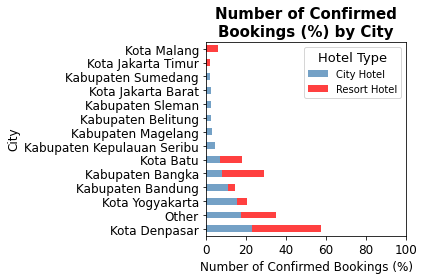

In [12]:
# Visualising the number of confirmed(non-cancelled) bookings by city
plt.figure(figsize=(100, 100))
city_data.set_index('City').plot(kind='barh', stacked=True, color=['steelblue', 'red'], alpha=0.75)
plt.title('Number of Confirmed\nBookings (%) by City', fontsize=15, fontweight='bold')
plt.xlabel('Number of Confirmed Bookings (%)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xlim(0, 100)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(title='Hotel Type', title_fontsize=13, prop={'size':10})
plt.tight_layout()
plt.savefig('city', dpi=200);
plt.show()

## Market Segment Analysis ##

In [13]:
# Make a copy of cleaned dataset
df3 = df.copy()
# To know the actual visitor numbers, only bookings that were not canceled are included
# Create new table for City Hotel
msc = df3.loc[(df2['hotel'] == 'City Hotel') & (df3['is_canceled'] == 0)]
msc = msc.groupby('market_segment')['hotel'].agg('count').reset_index()
msc.columns = ['market_segment', 'City Hotel']
# Create new table for Resort Hotel
msr = df3.loc[(df3['hotel'] == 'Resort Hotel') & (df2['is_canceled'] == 0)]
msr = msr.groupby('market_segment')['hotel'].agg('count').reset_index()
msr.columns = ['market_segment', 'Resort Hotel']

# Merge two tables to get the number of confirmed hotel bookings based on market segment for both hotels
ms_data = msc.merge(msr, how='outer', left_on = 'market_segment', right_on = 'market_segment')
ms_data

,market_segment,City Hotel,Resort Hotel
0,Aviation,180,NaN
1,Complementary,460,168.0
2,Corporate,2322,1920.0
3,Direct,4963,5556.0
4,Groups,4335,3331.0
5,Offline TA/TO,9477,6271.0
6,Online TA,24096,11310.0


<Figure size 5040x5040 with 0 Axes>

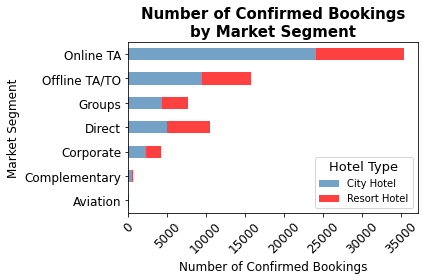

In [14]:
# Visualising the number of confirmed (non-cancelled) bookings by market segment
plt.figure(figsize=(70, 70))
ms_data.set_index('market_segment').plot(kind='barh', stacked=True, color=['steelblue', 'red'], alpha=0.75)
plt.title('Number of Confirmed Bookings\nby Market Segment', fontsize=15, fontweight='bold')
plt.xlabel('Number of Confirmed Bookings', fontsize=12)
plt.ylabel('Market Segment', fontsize=12)
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(title='Hotel Type', title_fontsize=13, prop={'size':10})
plt.tight_layout()
plt.savefig('market segment', dpi=200)
plt.show()

## How does the price per night vary over the year? ##

In [15]:
# Make a copy of cleaned dataset
df4 = df_clean.copy()
# To get the actual number of visitors, only bookings that were not canceled are included
# Create new table for Resort Hotel
resor_h = df4.loc[(df3['hotel'] == 'Resort Hotel') & (df4['is_canceled'] == 0)]
# Create new table for City Hotel
city_h = df4.loc[(df3['hotel'] == 'City Hotel') & (df4['is_canceled'] == 0)]
# Counting adults and children as paying guests only, not babies
resor_h['adr_pp'] = resor_h['adr'] / (resor_h['adults'] + resor_h['children'])
city_h['adr_pp'] = city_h['adr'] / (city_h['adults'] + city_h['children'])
print("""From all confirmed bookings, across all room types and meals, the average prices are:
Resort hotel: IDR {:.2f} per night and person.
City hotel: IDR {:.2f} per night and person."""
      .format(resor_h['adr_pp'].mean(), city_h['adr_pp'].mean()))

From all confirmed bookings, across all room types and meals, the average prices are:
Resort hotel: IDR 48.11 per night and person.
City hotel: IDR 59.60 per night and person.


In [16]:
# Normalize price per night (adr):
df4['adr_pp'] = df4['adr'] / (df4['adults'] + df4['children'])
df4_full = df4.loc[df3['is_canceled'] == 0] # Only actual guests
room_prices = df4_full[['hotel', 'adr_pp']]
room_prices_monthly = df4_full[['hotel', 'arrival_date_month', 'adr_pp']].sort_values('arrival_date_month')

# Order by month:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
room_prices_monthly['month'] = room_prices_monthly['arrival_date_month'].str[:3]
room_prices_monthly['month'] = pd.Categorical(room_prices_monthly['month'], categories=month, ordered=True)
room_prices_monthly.groupby(['hotel', 'month'])['adr_pp'].agg('mean').reset_index()

,hotel,month,adr_pp
0,City Hotel,Jan,57.724856
1,City Hotel,Feb,48.068721
2,City Hotel,Mar,51.647505
3,City Hotel,Apr,51.405765
4,City Hotel,May,52.764344
5,City Hotel,Jun,58.861816
6,City Hotel,Jul,70.543800
7,City Hotel,Aug,66.488465
8,City Hotel,Sep,57.463650
9,City Hotel,Oct,57.933546


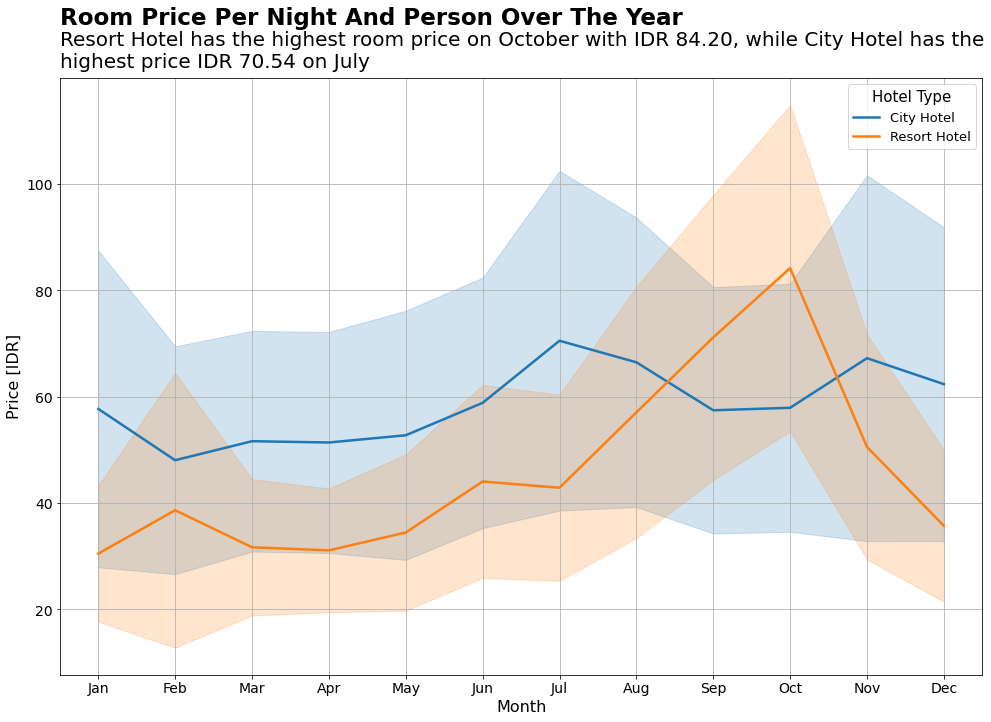

In [17]:
# Visualising room price per night and person over the year 
plt.figure(figsize=(15, 10))
sns.lineplot(x = 'month', y='adr_pp', hue='hotel', data=room_prices_monthly, size='hotel', sizes=(2.5, 2.5), hue_order = ['City Hotel', 'Resort Hotel'], ci='sd')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13})
plt.xlim(-0.5, 11.5) # membatasi x axis
plt.text(x=-0.5, y=130, s='Room Price Per Night And Person Over The Year', fontsize=23, fontweight='bold')
plt.text(x=-0.5, y=122, s='Resort Hotel has the highest room price on October with IDR 84.20, while City Hotel has the\nhighest price IDR 70.54 on July', fontsize=20)
plt.tight_layout()
plt.xlabel('Month', fontsize=16)
plt.ylabel('Price [IDR]', fontsize=16)
plt.savefig('room price', dpi=200)
plt.show()

## Monthly Hotel Booking Analysis Based on Hotel Type ##

In [18]:
# Make a copy of cleaned data
df5 = df_clean.copy()
# Using group by to aggregate the data to count monthly hotel booking based on hotel type
df5_agg = df5.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
df5_agg.columns = ['hotel_type', 'arrival_month', 'unique_year', 'num_booking'] # change the columns' name
df5_agg

,hotel_type,arrival_month,unique_year,num_booking
0,City Hotel,April,2,4917
1,City Hotel,August,2,7874
2,City Hotel,December,2,7554
3,City Hotel,February,2,4097
4,City Hotel,January,2,4309
5,City Hotel,July,2,8184
6,City Hotel,June,2,7458
7,City Hotel,March,2,3712
8,City Hotel,May,2,6411
9,City Hotel,November,2,7377


From the above output, we can see that the data for September and October were taken from 3 years ago, unlike the rest of them. In order to have fair comparison between each month, we need to normalize the data before calculate the average monthly booking.

In [19]:
# Normalize the data to calculate average monthly booking
df5_agg['average_num_booking'] = round(df5_agg['num_booking']/df5_agg['unique_year'])
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df5_agg['month'] = df5_agg['arrival_month'].str[:3]
df5_agg['month'] = pd.Categorical(df5_agg['month'], categories=month, ordered=True)
df5_agg

,hotel_type,arrival_month,unique_year,num_booking,average_num_booking,month
0,City Hotel,April,2,4917,2458.0,Apr
1,City Hotel,August,2,7874,3937.0,Aug
2,City Hotel,December,2,7554,3777.0,Dec
3,City Hotel,February,2,4097,2048.0,Feb
4,City Hotel,January,2,4309,2154.0,Jan
5,City Hotel,July,2,8184,4092.0,Jul
6,City Hotel,June,2,7458,3729.0,Jun
7,City Hotel,March,2,3712,1856.0,Mar
8,City Hotel,May,2,6411,3206.0,May
9,City Hotel,November,2,7377,3688.0,Nov


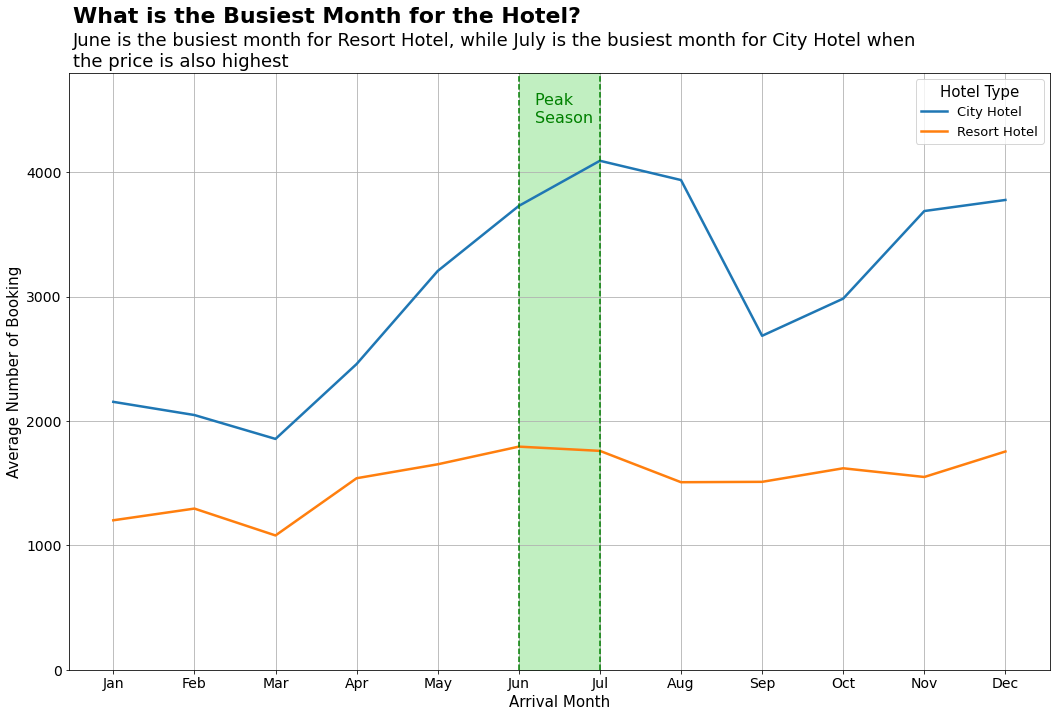

In [20]:
# Visualising average monthly hotel booking for both hotels
plt.figure(figsize=(15,10))
sns.lineplot(x='month', y='average_num_booking', hue='hotel_type', size="hotel_type", sizes=(2.5, 2.5), data=df5_agg) 
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid() # add gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13})
plt.xlabel('Arrival Month', fontsize=15)
plt.ylabel('Average Number of Booking', fontsize=15)
plt.ylim(0, 4800)
plt.axvline(5, ls='--', color='green')
plt.axvline(6, ls='--', color='green')
plt.text(x=5.2, y=4400, s='Peak \nSeason', fontsize=16, color='green')
plt.stackplot(np.arange(5,7,1), [[4800]], color='limegreen', alpha=0.3)
plt.text(x=-0.5, y=5200, s='What is the Busiest Month for the Hotel?', fontsize=22, fontweight='bold')
plt.text(x=-0.5, y=4850, s='June is the busiest month for Resort Hotel, while July is the busiest month for City Hotel when \nthe price is also highest', fontsize=18)
plt.tight_layout()
plt.savefig('average monthly booking', dpi=200)

## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rate ##

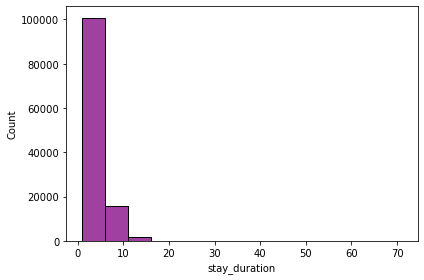

In [21]:
# Make a copy of cleaned data
df6 = df_clean.copy()
# Take a look at the distribution of stay duration
sns.histplot(data=df6, x='stay_duration', binwidth=5, color="purple")
plt.tight_layout()
plt.savefig('hist', dpi=200)

From the above image, we can see that stay_duration has right skewed. Thus, I will be grouping stay_duration into 4, with the following detail:
a. 1-7 days
b. 8-14 days
c. 15-21 days
d. >21 days

In [22]:
# Grouping stay_duration into 4 groups, 1-7 days, 8-14 days, 14-21 days and >21 days
df6['stay_duration_group'] = np.where(df6.stay_duration < 8, 7, 
                            (np.where((df6.stay_duration > 7) & (df6.stay_duration < 15), 14,
                            (np.where((df6.stay_duration > 14) & (df6.stay_duration < 22), 21, 22)))))
# Using group by to aggregate the data to count monthly hotel booking based on hotel type
df6_agg = df6.groupby(['hotel', 'is_canceled', 'stay_duration_group'])['arrival_date_month'].count().reset_index(name='num_bookings')
df6_pivot = df6_agg.pivot_table(index=['hotel', 'stay_duration_group'], columns='is_canceled', values='num_bookings').reset_index()
df6_pivot['cancellation_rate'] = round(df6_pivot[1]*100.0/(df6_pivot[0]+df6_pivot[1]), 2)
df6_pivot

is_canceled,hotel,stay_duration_group,0,1,cancellation_rate
0,City Hotel,7,45287,32391,41.70
1,City Hotel,14,511,558,52.20
2,City Hotel,21,29,76,72.38
3,City Hotel,22,6,41,87.23
4,Resort Hotel,7,25754,9907,27.78
5,Resort Hotel,14,2650,1078,28.92
6,Resort Hotel,21,90,79,46.75
7,Resort Hotel,22,62,46,42.59


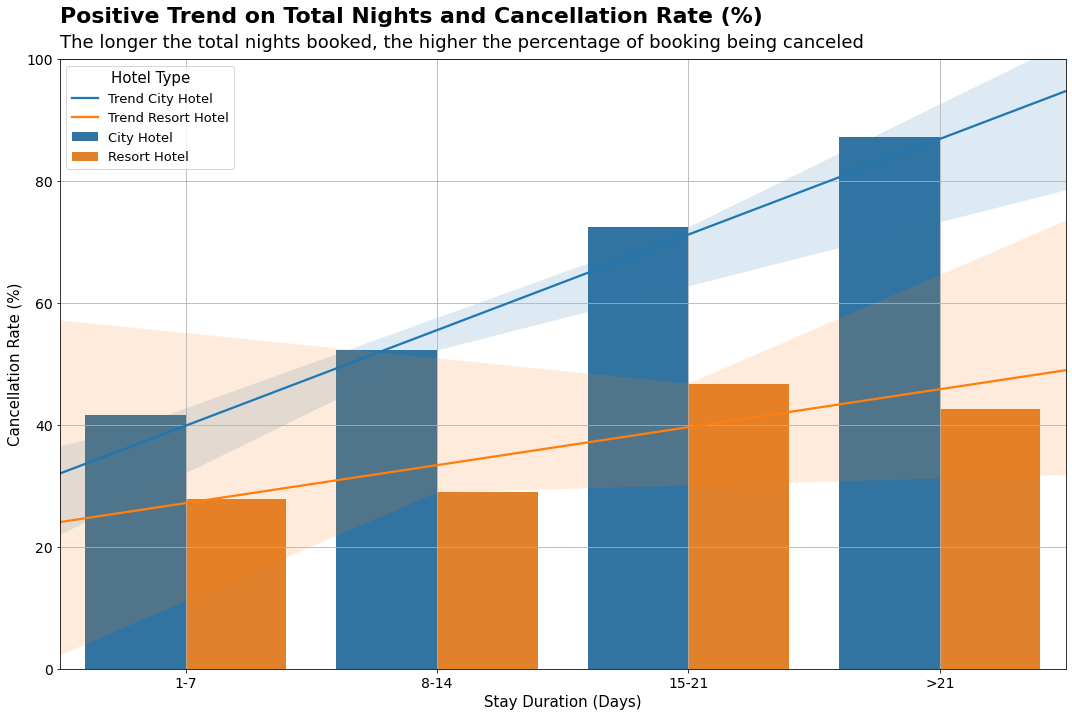

In [23]:
# Visualising total nights and cancellation rate
plt.figure(figsize=(15,10))
ax = sns.barplot(x='stay_duration_group', y='cancellation_rate', hue='hotel', data=df6_pivot)
for c in ax.patches:
    c.set_zorder(0)
sns.regplot(x=np.arange(0, len(df6_pivot[df6_pivot['hotel'] == 'City Hotel'])), y='cancellation_rate', 
            data=df6_pivot[df6_pivot['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel', truncate=False)
sns.regplot(x=np.arange(0, len(df6_pivot[df6_pivot['hotel'] == 'City Hotel'])), y='cancellation_rate', 
            data=df6_pivot[df6_pivot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13})
plt.xticks(range(0,4,1), labels=['1-7', '8-14', '15-21', '>21'])
plt.xlabel('Stay Duration (Days)', fontsize=15)
plt.ylabel('Cancellation Rate (%)', fontsize=15)
plt.ylim(0, 100)
plt.xlim(-0.5, 3.5)
plt.text(x=-0.5, y=106, s='Positive Trend on Total Nights and Cancellation Rate (%)', fontsize=22, fontweight='bold')
plt.text(x=-0.5, y=102, s='The longer the total nights booked, the higher the percentage of booking being canceled', fontsize=18)
plt.tight_layout()
plt.savefig('stay duration', dpi=200)

## Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate ##

In [24]:
# Create a copy of cleaned dataset
df7 = df_clean.copy() 
# Categorize lead time into 6 groups of interval
def group(x):
    if x['lead_time'] <= 30:
        group = 30
    elif x['lead_time'] >= 31 and x['lead_time'] <= 120:
        group = 120
    elif x['lead_time'] >= 121 and x['lead_time'] <= 210:
        group = 210
    elif x['lead_time'] >= 211 and x['lead_time'] <= 300:
        group = 300
    elif x['lead_time'] >= 301 and x['lead_time'] <= 360:
        group = 360
    else:
        group = 361
    return group

df7['lead_time_group'] = df7.apply(lambda x: group(x), axis=1)
df7.head()

# Using group by to aggregate the data to get the cancellation rate for each group of lead time
df7_agg = df7.groupby(['hotel', 'is_canceled', 'lead_time_group'])['hotel'].count().reset_index(name='num_bookings')
df7_pivot = df7_agg.pivot_table(index=['hotel', 'lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
df7_pivot['cancellation_rate'] = round(df7_pivot[1]*100.0/(df7_pivot[0]+df7_pivot[1]), 2)
df7_pivot

is_canceled,hotel,lead_time_group,0,1,cancellation_rate
0,City Hotel,30,17848,5174,22.47
1,City Hotel,120,16406,11783,41.80
2,City Hotel,210,7298,7051,49.14
3,City Hotel,300,2760,4376,61.32
4,City Hotel,360,731,2608,78.11
5,City Hotel,361,790,2074,72.42
6,Resort Hotel,30,13096,1976,13.11
7,Resort Hotel,120,7663,3999,34.29
8,Resort Hotel,210,4585,2685,36.93
9,Resort Hotel,300,2263,1723,43.23


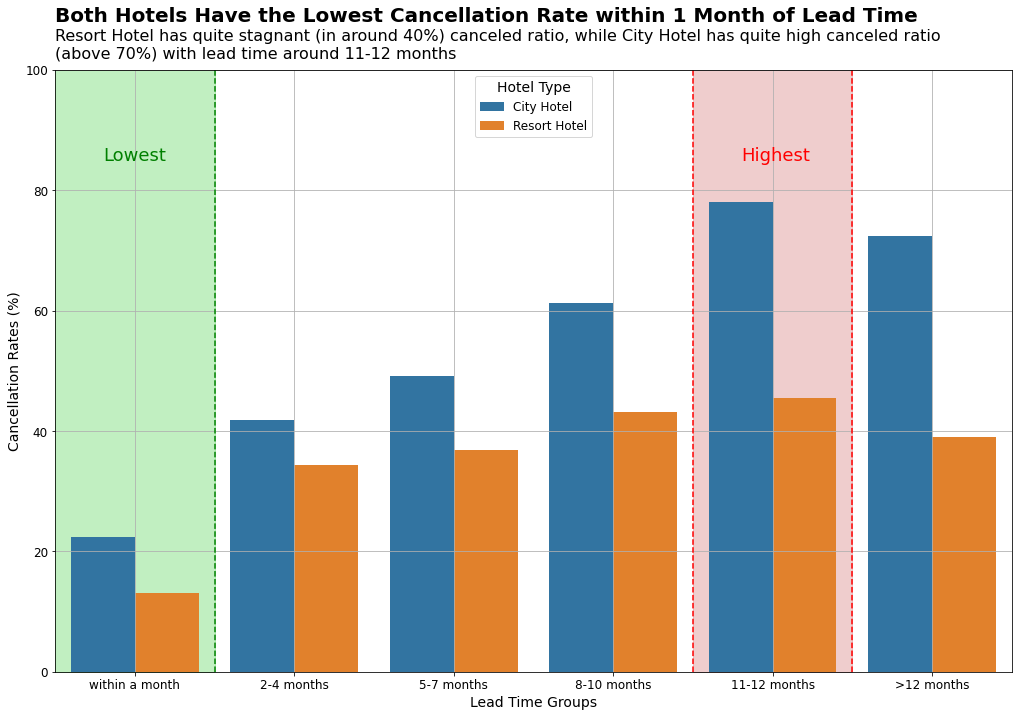

In [25]:
# Visualising impact analysis of lead time on hotel bookings cancellation rate
plt.figure(figsize=(15,10))
sns.barplot(x='lead_time_group', y='cancellation_rate', hue='hotel', data=df7_pivot)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.legend(title='Hotel Type', title_fontsize=14, prop={'size':12}, loc=9)
plt.xticks(range(0,6,1), labels=['within a month', '2-4 months', '5-7 months', '8-10 months', '11-12 months', '>12 months'])
plt.xlabel('Lead Time Groups', fontsize=14) 
plt.ylabel('Cancellation Rates (%)', fontsize=14)
plt.ylim(0, 100)
plt.xlim(-0.5,5.5)
plt.axvline(0.5, ls='--', color='green')
plt.text(x=-0.2, y=85, s='Lowest', fontsize=18, color='green')
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='limegreen', alpha=0.3)
plt.axvline(3.5, ls='--', color='red')
plt.axvline(4.5, ls='--', color='red')
plt.text(x=3.8, y=85, s='Highest', fontsize=18, color='red')
plt.stackplot(np.arange(3.5,5.5,1), [[100]], color='indianred', alpha=0.3)
plt.text(x=-0.5, y=108, s='Both Hotels Have the Lowest Cancellation Rate within 1 Month of Lead Time', fontsize=20, fontweight='bold')
plt.text(x=-0.5, y=102, s='Resort Hotel has quite stagnant (in around 40%) canceled ratio, while City Hotel has quite high canceled ratio \n(above 70%) with lead time around 11-12 months', 
         fontsize=16)
plt.tight_layout()
plt.savefig('lead time', dpi=200)